# Prática - 19/10
## Regressão Linear Múltipla e Regressão Polinomial

1. Implemente o coeficiente de determinação ajustado
2. Faça uma regressão polinomial no dataset aerogerador.txt

In [2]:
print(__doc__)


import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

#Questão 1
def total_sum_of_squares(y):
    mean_y = np.mean(y)
    return sum((v-mean_y)**2 for v in y)

def r_squared(y,yb):
    #y = valor real; yb = valor real
    return 1.0 - sum((y-yb)**2)/total_sum_of_squares(y)

def adjusted_r_squared(y,yb,p):
    #y = valor real; yb = valor real
    #p = numero de parametros(coeficientes da regressão)
    #n = numero de amostras
    n = len(y)
    return 1.0 - (sum((y-yb)**2)/(n-p))/(total_sum_of_squares(y)/(n-1))

Automatically created module for IPython interactive environment


In [3]:
#Questão 2
def expand_features(x,k):
    n = len(x)
    ones = np.ones(n).reshape(-1,1)
    x = x.reshape(-1,1)
    polynomial_x = np.append(ones,x,axis=1) #axis=1 append de coluna
    for i in range(2,k+1):
        polynomial_x = np.append(polynomial_x,x**i,axis=1)
    return polynomial_x
    
data = np.loadtxt("aerogerador.txt",delimiter=",")

rdata = np.random.permutation(data)
X = rdata[:,0]
y = rdata[:,1]

k = 4
expanded_X = expand_features(X,k)
#l = número de linhas, c = número de colunas
print expanded_X.shape

nt = int(len(expanded_X) * 0.8)
X_train = expanded_X[:nt,:]
X_test = expanded_X[nt:,:]
y_train = y[:nt]
y_test = y[nt:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

(2250, 5)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
yb = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', [regr.coef_ , regr.intercept_])
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((yb - y_test) ** 2))
print ("R-squared: %.2f" % r_squared(yb,y_test))
print ("Adjusted R-squared: %.2f" % adjusted_r_squared(yb,y_test,k+1))

('Coefficients: \n', [array([  0.        ,  10.32485258,  -5.06993467,   1.44758343,  -0.06832839]), -0.2161085669312115])
Mean squared error: 289.29
R-squared: 0.97
Adjusted R-squared: 0.97


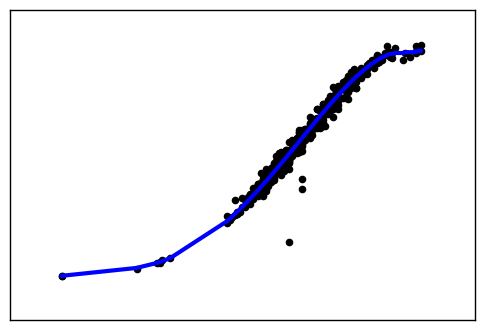

In [5]:
# Plot outputs
x1 = X_test[:,1]
plt.scatter(x1, y_test,  color='black')
plt.plot(np.sort(x1), np.sort(yb), color='blue',linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()